In [1]:
using ModelingToolkit, OrdinaryDiffEq

In [2]:
using PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils

┌ Warning: Hardware is unsupported by NNPACK so falling back to default NNlib
└ @ NNlib /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/nnpack/NNPACK.jl:42
┌ Info: Precompiling MEngProject [d0493a11-efc0-4c7c-9b66-d0bd5a04cc55]
└ @ Base loading.jl:1260
┌ Warning: Hardware is unsupported by NNPACK so falling back to default NNlib
└ @ NNlib ~/.julia/packages/NNlib/GhWiz/src/nnpack/NNPACK.jl:42


In [20]:
img = convert(Array{Float32,2}, load("../input_img/Iine_100_100_gs.png"));

In [141]:
p = Laminart.kernels(Parameters.parameters)

(K = 2, δ_v = 1.25, δ_c = 0.25, δ_m = 0.01875, δ_z = 0.125, δ_s = 2.5, σ_1 = 1, C_1 = 1.5, C_2 = 0.075, σ_2 = 0.5, γ = 10, α = 0.5, ϕ = 2.0, Γ = 0.2, V_21 = 0, μ = 2, ν = 1.1, n = 6, att = 0, η_p = 2.1, η_m = 1.5, λ = 1.5, a_23_ex = 3, a_23_in = 0.5, v12_6 = 1, v12_4 = 5, ψ = 0.5, C_AB_l = 5, H_σ_x = 3, H_σ_y = 4, H_fact = 5, H_l = 19, T_fact = [0.87, 0.13], T_p_m = 0.302, T_v2_fact = 0.625, lgn_equ_u = 1, lgn_equ_A = 0, lgn_equ_B = 0, filling = "circular", k_gauss_1 = [0.002969016743950497 0.013306209891013651 … 0.013306209891013651 0.002969016743950497; 0.013306209891013651 0.059634295436180124 … 0.059634295436180124 0.013306209891013651; … ; 0.013306209891013651 0.059634295436180124 … 0.059634295436180124 0.013306209891013651; 0.002969016743950497 0.013306209891013651 … 0.013306209891013651 0.002969016743950497… ; ], k_gauss_2 = [6.962478188799075e-8 2.8088641754266945e-5 … 2.8088641754266945e-5 6.962478188799075e-8; 2.8088641754266945e-5 0.011331766853773576 … 0.011331766853773576 

In [30]:
u = Laminart.I_u(img, p)


100×100 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [31]:
img

100×100 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [32]:
# v_p = fun_equ.(u_p)
# v_m = fun_equ.(u_m)
# v = relu.(v_p)-relu.(v_m)
# V = exp(-1/8) .* imfilter(v, Kernel.gaussian(σ_2), "circular")

In [34]:
v_p, v_m, x_lgn, x, y, m, z, s, C, H_z, x_V2, y_V2, m_V2, z_V2, s_V2, H_z_V2 = Laminart.varables(img, p);

(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 0.

In [195]:
@parameters t p u x_V2
@variables v_p(t) v_m(t) x_lgn(t) x(t) y(t) m(t) z(t) s(t) C(t) H_z(t) 
@derivatives D'~t

((D'~t),)

In [197]:
p = Laminart.kernels(img, Parameters.parameters)

(K = 2, δ_v = 1.25, δ_c = 0.25, δ_m = 0.01875, δ_z = 0.125, δ_s = 2.5, σ_1 = 1, C_1 = 1.5, C_2 = 0.075, σ_2 = 0.5, γ = 10, α = 0.5, ϕ = 2.0, Γ = 0.2, V_21 = 0, μ = 2, ν = 1.1, n = 6, att = 0, η_p = 2.1, η_m = 1.5, λ = 1.5, a_23_ex = 3, a_23_in = 0.5, v12_6 = 1, v12_4 = 5, ψ = 0.5, C_AB_l = 5, H_σ_x = 3, H_σ_y = 4, H_fact = 5, H_l = 19, T_fact = [0.87, 0.13], T_p_m = 0.302, T_v2_fact = 0.625, H_size = 19, W_size = 19, lgn_equ_u = 1, lgn_equ_A = 0, lgn_equ_B = 0, filling = "circular", k_gauss_1 = [0.002969016743950497 0.013306209891013651 … 0.013306209891013651 0.002969016743950497; 0.013306209891013651 0.059634295436180124 … 0.059634295436180124 0.013306209891013651; … ; 0.013306209891013651 0.059634295436180124 … 0.059634295436180124 0.013306209891013651; 0.002969016743950497 0.013306209891013651 … 0.013306209891013651 0.002969016743950497… ; ], k_gauss_2 = [6.962478188799075e-8 2.8088641754266945e-5 … 2.8088641754266945e-5 6.962478188799075e-8; 2.8088641754266945e-5 0.0113317668537735

In [199]:
eqs = [D(v_p) ~ Laminart.fun_dv(v_p, u, x_lgn, p),
    D(v_m) ~ Laminart.fun_dv(v_m, .-u, x_lgn, p),
    x_lgn ~ Laminart.fun_x_lgn(x),
    C ~ Laminart.fun_v_C(v_p, v_m, p),
    D(x) ~ Laminart.fun_dx_V1(x, C, z, x_v2, p),
    D(y) ~ Laminart.fun_dy(y, C, x, m, p),
    D(m) ~ Laminart.fun_dm(m, x, p),
    D(z) ~ Laminart.fun_dz(z, y, H_z, p),
    D(s) ~ Laminart.fun_ds(s, z, H_z, p),
    H_z ~ Laminart.fun_H_z(z, p)]

MethodError: MethodError: no method matching imfilter(::Operation, ::OffsetArray{Float64,2,Array{Float64,2}}, ::String)
Closest candidates are:
  imfilter(!Matched::AbstractArray, ::Any, ::Any...) at /Users/niallcullinane/.julia/packages/ImageFiltering/eH8Od/src/imfilter.jl:5
  imfilter(!Matched::ComputationalResources.AbstractResource, ::AbstractArray, ::Any, !Matched::Any...) at /Users/niallcullinane/.julia/packages/ImageFiltering/eH8Od/src/imfilter.jl:32
  imfilter(!Matched::Type{T}, ::AbstractArray, !Matched::Union{ImageFiltering.Kernel.Laplacian, Union{ImageFiltering.KernelFactors.IIRFilter{T}, AbstractArray{T,N} where N, ImageFiltering.KernelFactors.ReshapedOneD{T,N,Npre,V} where V<:(AbstractArray{T,1} where T) where Npre where N, ImageFiltering.KernelFactors.ReshapedOneD{T,N,Npre,V} where V<:ImageFiltering.KernelFactors.IIRFilter where Npre where N} where T}, !Matched::Any...) where T at /Users/niallcullinane/.julia/packages/ImageFiltering/eH8Od/src/imfilter.jl:10
  ...

In [ ]:
eqs = [Laminart.fun_dv(v_p, u, x_lgn, p),
    Laminart.fun_dv(v_m, .-u, x_lgn, p),
    Laminart.fun_x_lgn(x),
    Laminart.fun_v_C(v_p, v_m, p),
    Laminart.fun_dx_V1(x, C, z, x_V2, p),
    Laminart.fun_dy(y, C, x, m, p),
    Laminart.fun_dm(m, x, p),
    Laminart.fun_dz(z, y, H_z, s, p),
    Laminart.fun_ds(s, z, H_z, p),
    Laminart.fun_H_z(z, p)]

In [44]:
p = Laminart.kernels(Parameters.parameters)

(K = 2, δ_v = 1.25, δ_c = 0.25, δ_m = 0.01875, δ_z = 0.125, δ_s = 2.5, σ_1 = 1, C_1 = 1.5, C_2 = 0.075, σ_2 = 0.5, γ = 10, α = 0.5, ϕ = 2.0, Γ = 0.2, V_21 = 0, μ = 2, ν = 1.1, n = 6, att = 0, η_p = 2.1, η_m = 1.5, λ = 1.5, a_23_ex = 3, a_23_in = 0.5, v12_6 = 1, v12_4 = 5, ψ = 0.5, C_AB_l = 5, H_σ_x = 3, H_σ_y = 4, H_fact = 5, H_l = 19, T_fact = [0.87, 0.13], T_p_m = 0.302, T_v2_fact = 0.625, lgn_equ_u = 1, lgn_equ_A = 0, lgn_equ_B = 0, filling = "circular", k_gauss_1 = [0.002969016743950497 0.013306209891013651 … 0.013306209891013651 0.002969016743950497; 0.013306209891013651 0.059634295436180124 … 0.059634295436180124 0.013306209891013651; … ; 0.013306209891013651 0.059634295436180124 … 0.059634295436180124 0.013306209891013651; 0.002969016743950497 0.013306209891013651 … 0.013306209891013651 0.002969016743950497… ; ], k_gauss_2 = [6.962478188799075e-8 2.8088641754266945e-5 … 2.8088641754266945e-5 6.962478188799075e-8; 2.8088641754266945e-5 0.011331766853773576 … 0.011331766853773576 

In [2]:


@parameters t σ ρ β
@variables x(t) y(t) z(t)
@derivatives D'~t

eqs = [D(D(x)) ~ σ*(y-x),
       D(y) ~ x*(ρ-z)-y,
       D(z) ~ x*y - β*z]

sys = ODESystem(eqs)
sys = ode_order_lowering(sys)

u0 = [D(x) => 2.0,
      x => 1.0,
      y => 0.0,
      z => 0.0]

p  = [σ => 28.0,
      ρ => 10.0,
      β => 8/3]

tspan = (0.0,100.0)
prob = ODEProblem(sys,u0,tspan,p,jac=true)
sol = solve(prob,Tsit5())



retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 1495-element Array{Float64,1}:
   0.0
   0.00014131524176735154
   0.0015544676594408668
   0.012956354376040367
   0.03826664525553091
   0.07852285780727297
   0.1221085871779797
   0.17155370111069532
   0.2311290051576952
   0.3025237753625223
   0.38386210343504795
   0.4740502676365014
   0.5734249654582436
   ⋮
  99.32332879945807
  99.38925549815325
  99.44426735631266
  99.50500394819626
  99.57665666226691
  99.6428364061332
  99.72166965090483
  99.7996756193306
  99.86801143155778
  99.93304884245396
  99.99013919249268
 100.0
u: 1495-element Array{Array{Float64,1},1}:
 [2.0, 0.0, 0.0, 1.0]
 [1.9960454103704428, 0.0014132521265988686, 9.986094350108778e-8, 1.0002823510089436]
 [1.956746201469907, 0.015556571232987228, 1.2096178746316845e-5, 1.0030752466310615]
 [1.6563917815291291, 0.13029704829224828, 0.000846485237693049, 1.023644971980818]
 [1.1011952710610342, 0.38741249768210007, 0.0074452897

In [3]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


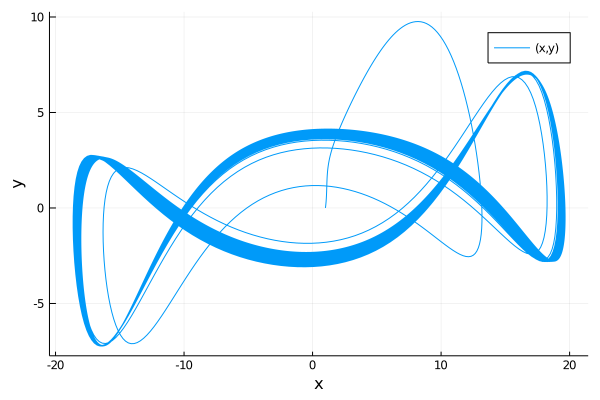

In [4]:
plot(sol,vars=(x,y))

In [80]:
@parameters t p u x_V2
@variables v_p(t) v_m(t) x_lgn(t) x(t) y(t) m(t) z(t) s(t) C(t) H_z(t) 
@derivatives D'~t
p = Laminart.kernels(Parameters.parameters)
u0 = Laminart.varables(img, p)
eqs = [D(v_p) ~ Laminart.fun_dv(v_p, u, x_lgn, p),
    D(v_m) ~ Laminart.fun_dv(v_m, .-u, x_lgn, p),
    x_lgn ~ Laminart.fun_x_lgn(x),
    C ~ Laminart.fun_v_C(v_p, v_m, p),
    D(x) ~ Laminart.fun_dx_V1(x, C, z, x_v2, p),
    D(y) ~ Laminart.fun_dy(y, C, x, m, p),
    D(m) ~ Laminart.fun_dm(m, x, p),
    D(z) ~ Laminart.fun_dz(z, y, H_z, p),
    D(s) ~ Laminart.fun_ds(s, z, H_z, p),
    H_z ~ Laminart.fun_h(s)]

sys = ODESystem(eqs)
sys = ode_order_lowering(sys)





u0 = Laminart.varables(img, p)

tspan = (0.0,1.0)
prob = ODEProblem(sys,u0,tspan,p,jac=true)
sol = solve(prob,Tsit5())

MethodError: MethodError: no method matching relu(::Operation)
Closest candidates are:
  relu(!Matched::Real) at /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/activation.jl:63
  relu(!Matched::AbstractArray, !Matched::Any...) at /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/activation.jl:226

In [72]:
# Generate the constants

p = Laminart.kernels(Parameters.parameters)
v_p, v_m, x_lgn, x, y, m, z, s, C, H_z, x_V2, y_V2, m_V2, z_V2, s_V2, H_z_V2 = Laminart.varables(img, p)
# Ax = Array(Tridiagonal([1.0 for i in 1:N-1],[-2.0 for i in 1:N],[1.0 for i in 1:N-1]))
# Ay = copy(Ax)
# Ax[2,1] = 2.0
# Ax[end-1,end] = 2.0
# Ay[1,2] = 2.0
# Ay[end,end-1] = 2.0

function basic_version!(dr,r,p,t)
 eqs = [D(v_p) ~ Laminart.fun_dv(v_p, u, x_lgn, p),
    D(v_m) ~ Laminart.fun_dv(v_m, .-u, x_lgn, p),
    x_lgn ~ Laminart.fun_x_lgn(x),
    C ~ Laminart.fun_v_C(vₚ, vₘ, p),
    D(x) ~ Laminart.fun_dx_V1(x, C, z, x_v2, p),
    D(y) ~ Laminart.fun_dy(y, C, x, m, p),
    D(m) ~ Laminart.fun_dm(m, x, p),
    D(z) ~ Laminart.fun_dz(z, y, H_z, p),
    D(s) ~ Laminart.fun_ds(s, z, H_z, p),
    H_z ~ Laminart.fun_h(s)] 
  u = r[:,:,1]
  v = r[:,:,2]
  Du = D1*(Ay*u + u*Ax)
  Dv = D2*(Ay*v + v*Ax)
  dr[:,:,1] = Du .+ a.*u.*u./v .+ ubar .- α*u
  dr[:,:,2] = Dv .+ a.*u.*u .- β*v
end

a,α,ubar,β,D1,D2 = p
uss = (ubar+β)/α
vss = (a/β)*uss^2
r0 = zeros(100,100,2)
r0[:,:,1] .= uss.+0.1.*rand.()
r0[:,:,2] .= vss

prob = ODEProblem(basic_version!,r0,(0.0,0.1),p)

ODEProblem with uType Array{Float64,3} and tType Float64. In-place: true
timespan: (0.0, 0.1)
u0: [0.2399832132897284 0.29765112672509114 … 0.2806182593311837 0.2253361129872023; 0.24982407658654518 0.28309777131740016 … 0.25763110999537225 0.28701230009323897; … ; 0.22876664217668863 0.295917071245972 … 0.22317985001197932 0.286632608001638; 0.21858946499517204 0.2622898262280042 … 0.2175323896346897 0.27514479668620223]

[4.930666666666666 4.930666666666666 … 4.930666666666666 4.930666666666666; 4.930666666666666 4.930666666666666 … 4.930666666666666 4.930666666666666; … ; 4.930666666666666 4.930666666666666 … 4.930666666666666 4.930666666666666; 4.930666666666666 4.930666666666666 … 4.930666666666666 4.930666666666666]

In [66]:
using DifferentialEquations, DiffEqProblemLibrary.ODEProblemLibrary
# load problems
ODEProblemLibrary.importodeproblems()
prob = ODEProblemLibrary.prob_ode_linear
sol = solve(prob)

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1260


retcode: Success
Interpolation: Automatic order switching interpolation
t: 5-element Array{Float64,1}:
 0.0
 0.09964258706516003
 0.3457024247583422
 0.6776921908052249
 1.0
u: 5-element Array{Float64,1}:
 0.5
 0.552938681151017
 0.7089376245893465
 0.9913594502399237
 1.3728004409033034

In [69]:
prob1 = prob_ode_large2Dlinear

ODEProblem with uType Array{Float64,2} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: [0.7376632403158268 0.7585710341242167 … 0.7911335397485195 0.8232918915824801; 0.07641838381384125 0.07057187424496592 … 0.14788142748081579 0.5956037369976033; … ; 0.2547934167953987 0.19356953154007273 … 0.6786492450343591 0.9727545053153894; 0.18682363108633426 0.5018078213692234 … 0.3961410433589485 0.8681941503861808]

In [ ]:
sol1 = solve(prob1)

In [74]:
vara = Laminart.varables(img, p)

16-element Array{Array{Float32,N} where N,1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 

ErrorException: syntax: misplaced assignment statement in "[("aa" => [1 2]), "bb" = [[1 2], [3 4]]]"

In [70]:
prob1

ODEProblem with uType Array{Float64,2} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: [0.7376632403158268 0.7585710341242167 … 0.7911335397485195 0.8232918915824801; 0.07641838381384125 0.07057187424496592 … 0.14788142748081579 0.5956037369976033; … ; 0.2547934167953987 0.19356953154007273 … 0.6786492450343591 0.9727545053153894; 0.18682363108633426 0.5018078213692234 … 0.3961410433589485 0.8681941503861808]

In [71]:
prob1[1]

MethodError: MethodError: no method matching getindex(::ODEProblem{Array{Float64,2},Tuple{Float64,Float64},true,Float64,ODEFunction{true,DiffEqProblemLibrary.ODEProblemLibrary.var"#5#6",LinearAlgebra.UniformScaling{Bool},DiffEqProblemLibrary.ODEProblemLibrary.var"#7#8",Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},DiffEqBase.StandardODEProblem}, ::Int64)

In [191]:
p = Laminart.kernels(img, Parameters.parameters)
u = Laminart.I_u(img, p)
v_p, v_m, x_lgn, x, y, m, z, s, C, H_z, x_V2, y_V2, m_V2, z_V2, s_V2, H_z_V2 = Laminart.varables(img, p)
a = Laminart.fun_dv(v_p, u, x_lgn, p)
eqs = [Laminart.fun_dv(v_p, u, x_lgn, p),
    Laminart.fun_dv(v_m, .-u, x_lgn, p),
    Laminart.fun_x_lgn(x),
    Laminart.fun_v_C(v_p, v_m, p),
    Laminart.fun_dx_V1(x, C, z, x_V2, p),
    Laminart.fun_dy(y, C, x, m, p),
    Laminart.fun_dm(m, x, p),
    Laminart.fun_dz(z, y, H_z, s, p),
    Laminart.fun_ds(s, z, H_z, p),
    Laminart.fun_H_z(z, p)]

┌ Warning: assuming that the origin is at the center of the kernel; to avoid this warning, call `centered(kernel)` or use an OffsetArray
│   caller = kernelshift at imfilter.jl:1522 [inlined]
└ @ Core /Users/niallcullinane/.julia/packages/ImageFiltering/eH8Od/src/imfilter.jl:1522
┌ Warning: assuming that the origin is at the center of the kernel; to avoid this warning, call `centered(kernel)` or use an OffsetArray
│   caller = kernelshift at imfilter.jl:1522 [inlined]
└ @ Core /Users/niallcullinane/.julia/packages/ImageFiltering/eH8Od/src/imfilter.jl:1522


10-element Array{Array,1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 Float32[0.0 0.0 … 0.1483159 0.14835167; 0.0 0.0 … 1.0f-45 1.0f-45; … ; 1.1954f-41 5.954f-41 … 0.14835095 0.14838672; 0.0 0.0 … 1.0f-45 1.0f-45]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.

In [187]:
Laminart.fun_f(m .* Laminart.func_filter_W(m, p.k_W_p, p), p)

100×100×2 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [154]:
p.k_H[:,:,1]

┌ Error: Failed to revise /Users/niallcullinane/.julia/dev/MEngProject/src/Laminart.jl
│   exception = (LoadError("/Users/niallcullinane/.julia/dev/MEngProject/src/Laminart.jl", 56, "missing comma or ) in argument list"), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x0000000146e6eb61])
└ @ Revise /Users/niallcullinane/.julia/packages/Revise/tV8FE/src/Revise.jl:744
┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /Users/niallcullinane/.julia/dev/MEngProject/src/Laminart.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /Users/niallcullinane/.julia/packages/Revise/tV8FE/src/Revise.jl:804
┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /Users/niallcullinane/.julia/dev/MEngProject/src/Laminart.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /Users/niallcullinane/.julia/packages/Revise/tV8FE/src/Revise.

19×19 Array{Real,2}:
 5.97273e-5   0.0001016    0.000162356  …  0.0001016    5.97273e-5
 0.000153582  0.000261251  0.000417479     0.000261251  0.000153582
 0.000353388  0.000601133  0.000960608     0.000601133  0.000353388
 0.000727627  0.00123774   0.0019779       0.00123774   0.000727627
 0.00134064   0.0022805    0.00364423      0.0022805    0.00134064
 0.00221034   0.00375991   0.00600832   …  0.00375991   0.00221034
 0.003261     0.00554715   0.00886431      0.00554715   0.003261
 0.00430515   0.0073233    0.0117026       0.0073233    0.00430515
 0.00508593   0.00865146   0.013825        0.00865146   0.00508593
 0.00537648   0.0091457    0.0146148       0.0091457    0.00537648
 0.00508593   0.00865146   0.013825     …  0.00865146   0.00508593
 0.00430515   0.0073233    0.0117026       0.0073233    0.00430515
 0.003261     0.00554715   0.00886431      0.00554715   0.003261
 0.00221034   0.00375991   0.00600832      0.00375991   0.00221034
 0.00134064   0.0022805    0.00364423     

In [103]:
Laminart.func_filter_W(m, p.k_W_p, p)

┌ Warning: Likely overflow or conversion error detected. Consider specifying the output type, e.g., `imfilter(Float64, img, kernel, ...)`
└ @ ImageFiltering /Users/niallcullinane/.julia/packages/ImageFiltering/eH8Od/src/imfilter.jl:625


InexactError: InexactError: Int64(1.213920796417813e-30)

In [102]:
 sizeof(p.k_W_p)

11552

In [100]:
p.k_W_p

19×19×2×2 Array{Real,4}:
[:, :, 1, 1] =
 1.21392e-30  7.11482e-25  8.74082e-20  …  7.11482e-25  1.21392e-30
 3.12146e-30  1.82949e-24  2.2476e-19      1.82949e-24  3.12146e-30
 7.1824e-30   4.20962e-24  5.17168e-19     4.20962e-24  7.1824e-30
 1.47886e-29  8.66763e-24  1.06485e-18     8.66763e-24  1.47886e-29
 2.72476e-29  1.59699e-23  1.96196e-18     1.59699e-23  2.72476e-29
 4.49237e-29  2.63299e-23  3.23473e-18  …  2.63299e-23  4.49237e-29
 6.68544e-29  3.88484e-23  4.77233e-18     3.88484e-23  6.68544e-29
 3.52153e-24  1.73584e-20  3.75923e-17     1.73584e-20  3.52153e-24
 4.15176e-20  2.04049e-16  3.68937e-13     2.04049e-16  4.15176e-20
 9.44935e-19  4.64414e-15  8.39681e-12     4.64414e-15  9.44935e-19
 4.15176e-20  2.04049e-16  3.68937e-13  …  2.04049e-16  4.15176e-20
 3.52153e-24  1.73584e-20  3.75923e-17     1.73584e-20  3.52153e-24
 6.68544e-29  3.88484e-23  4.77233e-18     3.88484e-23  6.68544e-29
 4.49237e-29  2.63299e-23  3.23473e-18     2.63299e-23  4.49237e-29
 2.72476e

In [104]:
m

100×100×2 Array{Float32,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [105]:
W = p.k_W_p
out = copy(m)
    for k ∈ 1:p.K
        out[:,:,k] = imfilter(m[:,:,k], W[:,:,k,k], p.filling)
        for l ∈ 1:p.K
            if l ≠ k
                out[:,:,k] .+= imfilter(m[:,:,l], W[:,:,k,l], p.filling)
            end
        end
    end

┌ Warning: Likely overflow or conversion error detected. Consider specifying the output type, e.g., `imfilter(Float64, img, kernel, ...)`
└ @ ImageFiltering /Users/niallcullinane/.julia/packages/ImageFiltering/eH8Od/src/imfilter.jl:625


InexactError: InexactError: Int64(1.213920796417813e-30)

In [106]:
W = p.k_W_p
out = copy(m)


100×100×2 Array{Float32,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [107]:
        out[:,:,1] = imfilter(m[:,:,1], W[:,:,1,1], p.filling)


┌ Warning: Likely overflow or conversion error detected. Consider specifying the output type, e.g., `imfilter(Float64, img, kernel, ...)`
└ @ ImageFiltering /Users/niallcullinane/.julia/packages/ImageFiltering/eH8Od/src/imfilter.jl:625


InexactError: InexactError: Int64(1.213920796417813e-30)

In [108]:
m[:,:,1]

100×100 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [109]:
W[:,:,1,1]

19×19 Array{Real,2}:
 1.21392e-30  7.11482e-25  8.74082e-20  …  7.11482e-25  1.21392e-30
 3.12146e-30  1.82949e-24  2.2476e-19      1.82949e-24  3.12146e-30
 7.1824e-30   4.20962e-24  5.17168e-19     4.20962e-24  7.1824e-30
 1.47886e-29  8.66763e-24  1.06485e-18     8.66763e-24  1.47886e-29
 2.72476e-29  1.59699e-23  1.96196e-18     1.59699e-23  2.72476e-29
 4.49237e-29  2.63299e-23  3.23473e-18  …  2.63299e-23  4.49237e-29
 6.68544e-29  3.88484e-23  4.77233e-18     3.88484e-23  6.68544e-29
 3.52153e-24  1.73584e-20  3.75923e-17     1.73584e-20  3.52153e-24
 4.15176e-20  2.04049e-16  3.68937e-13     2.04049e-16  4.15176e-20
 9.44935e-19  4.64414e-15  8.39681e-12     4.64414e-15  9.44935e-19
 4.15176e-20  2.04049e-16  3.68937e-13  …  2.04049e-16  4.15176e-20
 3.52153e-24  1.73584e-20  3.75923e-17     1.73584e-20  3.52153e-24
 6.68544e-29  3.88484e-23  4.77233e-18     3.88484e-23  6.68544e-29
 4.49237e-29  2.63299e-23  3.23473e-18     2.63299e-23  4.49237e-29
 2.72476e-29  1.59699e-23  1

In [110]:
p.filling

"circular"

In [124]:
ke = reflect(Kernel.gaussian((p.σ_1, p.σ_1), (19, 19)))

19×19 OffsetArray(::Array{Float64,2}, -9:9, -9:9) with eltype Float64 with indices -9:9×-9:9:
 1.05674e-36  5.19362e-33  9.39029e-30  …  5.19362e-33  1.05674e-36
 5.19362e-33  2.55254e-29  4.61511e-26     2.55254e-29  5.19362e-33
 9.39029e-30  4.61511e-26  8.34431e-23     4.61511e-26  9.39029e-30
 6.24587e-27  3.0697e-23   5.55015e-20     3.0697e-23   6.24587e-27
 1.52831e-24  7.51131e-21  1.35808e-17     7.51131e-21  1.52831e-24
 1.37574e-22  6.76147e-19  1.2225e-15   …  6.76147e-19  1.37574e-22
 4.55584e-21  2.23909e-17  4.04837e-14     2.23909e-17  4.55584e-21
 5.55015e-20  2.72777e-16  4.93192e-13     2.72777e-16  5.55015e-20
 2.4874e-19   1.2225e-15   2.21033e-12     1.2225e-15   2.4874e-19
 4.10104e-19  2.01556e-15  3.64423e-12     2.01556e-15  4.10104e-19
 2.4874e-19   1.2225e-15   2.21033e-12  …  1.2225e-15   2.4874e-19
 5.55015e-20  2.72777e-16  4.93192e-13     2.72777e-16  5.55015e-20
 4.55584e-21  2.23909e-17  4.04837e-14     2.23909e-17  4.55584e-21
 1.37574e-22  6.76147e-1

In [125]:
        out[:,:,1] = imfilter(m[:,:,1], ke, p.filling)

100×100 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [127]:
LamKernels.gaussian_rot(p.H_σ_x, p.H_σ_y, 0, p.H_l)

19×19 OffsetArray(::Array{Float64,2}, -9:9, -9:9) with eltype Float64 with indices -9:9×-9:9:
 1.19455e-5   2.03199e-5   3.24711e-5   …  2.03199e-5   1.19455e-5
 3.07164e-5   5.22503e-5   8.34957e-5      5.22503e-5   3.07164e-5
 7.06776e-5   0.000120227  0.000192122     0.000120227  7.06776e-5
 0.000145525  0.000247547  0.000395579     0.000247547  0.000145525
 0.000268127  0.0004561    0.000728846     0.0004561    0.000268127
 0.000442067  0.000751982  0.00120166   …  0.000751982  0.000442067
 0.0006522    0.00110943   0.00177286      0.00110943   0.0006522
 0.000861029  0.00146466   0.00234052      0.00146466   0.000861029
 0.00101719   0.00173029   0.002765        0.00173029   0.00101719
 0.0010753    0.00182914   0.00292296      0.00182914   0.0010753
 0.00101719   0.00173029   0.002765     …  0.00173029   0.00101719
 0.000861029  0.00146466   0.00234052      0.00146466   0.000861029
 0.0006522    0.00110943   0.00177286      0.00110943   0.0006522
 0.000442067  0.000751982  0.0012

In [128]:
reflect(5 .* LamKernels.gaussian_rot(3,0.8,0,19) .+ LamKernels.gaussian_rot(0.4,1,0,19))

19×19 OffsetArray(::Array{Float64,2}, -9:9, -9:9) with eltype Float64 with indices -9:9×-9:9:
 1.21392e-30  7.11482e-25  8.74082e-20  …  7.11482e-25  1.21392e-30
 3.12146e-30  1.82949e-24  2.2476e-19      1.82949e-24  3.12146e-30
 7.1824e-30   4.20962e-24  5.17168e-19     4.20962e-24  7.1824e-30
 1.47886e-29  8.66763e-24  1.06485e-18     8.66763e-24  1.47886e-29
 2.72476e-29  1.59699e-23  1.96196e-18     1.59699e-23  2.72476e-29
 4.49237e-29  2.63299e-23  3.23473e-18  …  2.63299e-23  4.49237e-29
 6.68544e-29  3.88484e-23  4.77233e-18     3.88484e-23  6.68544e-29
 3.52153e-24  1.73584e-20  3.75923e-17     1.73584e-20  3.52153e-24
 4.15176e-20  2.04049e-16  3.68937e-13     2.04049e-16  4.15176e-20
 9.44935e-19  4.64414e-15  8.39681e-12     4.64414e-15  9.44935e-19
 4.15176e-20  2.04049e-16  3.68937e-13  …  2.04049e-16  4.15176e-20
 3.52153e-24  1.73584e-20  3.75923e-17     1.73584e-20  3.52153e-24
 6.68544e-29  3.88484e-23  4.77233e-18     3.88484e-23  6.68544e-29
 4.49237e-29  2.63299e-

In [137]:
W_temp = OffsetArray(reshape(Array{Real}(undef, 19, 19 * p.K * p.K), 19, 19, p.K, p.K), -9:9,-9:9, )

MethodError: MethodError: no method matching OffsetArray(::Array{Real,4}, ::UnitRange{Int64}, ::UnitRange{Int64})
Closest candidates are:
  OffsetArray(::AbstractArray{T,N}, !Matched::AbstractUnitRange...) where {T, N} at /Users/niallcullinane/.julia/packages/OffsetArrays/Z45he/src/OffsetArrays.jl:72
  OffsetArray(::AbstractArray{T,N}, !Matched::Int64...) where {T, N} at /Users/niallcullinane/.julia/packages/OffsetArrays/Z45he/src/OffsetArrays.jl:32
  OffsetArray(::AbstractArray{T,N}, !Matched::Tuple{Vararg{Int64,N}}) where {T, N} at /Users/niallcullinane/.julia/packages/OffsetArrays/Z45he/src/OffsetArrays.jl:27
  ...

In [138]:
W_temp[:,:,1,1] = reflect(5 .* LamKernels.gaussian_rot(3,0.8,0,19) .+ LamKernels.gaussian_rot(0.4,1,0,19))

19×19 OffsetArray(::Array{Float64,2}, -9:9, -9:9) with eltype Float64 with indices -9:9×-9:9:
 1.21392e-30  7.11482e-25  8.74082e-20  …  7.11482e-25  1.21392e-30
 3.12146e-30  1.82949e-24  2.2476e-19      1.82949e-24  3.12146e-30
 7.1824e-30   4.20962e-24  5.17168e-19     4.20962e-24  7.1824e-30
 1.47886e-29  8.66763e-24  1.06485e-18     8.66763e-24  1.47886e-29
 2.72476e-29  1.59699e-23  1.96196e-18     1.59699e-23  2.72476e-29
 4.49237e-29  2.63299e-23  3.23473e-18  …  2.63299e-23  4.49237e-29
 6.68544e-29  3.88484e-23  4.77233e-18     3.88484e-23  6.68544e-29
 3.52153e-24  1.73584e-20  3.75923e-17     1.73584e-20  3.52153e-24
 4.15176e-20  2.04049e-16  3.68937e-13     2.04049e-16  4.15176e-20
 9.44935e-19  4.64414e-15  8.39681e-12     4.64414e-15  9.44935e-19
 4.15176e-20  2.04049e-16  3.68937e-13  …  2.04049e-16  4.15176e-20
 3.52153e-24  1.73584e-20  3.75923e-17     1.73584e-20  3.52153e-24
 6.68544e-29  3.88484e-23  4.77233e-18     3.88484e-23  6.68544e-29
 4.49237e-29  2.63299e-

In [139]:
W_tempO = OffsetArray(W_temp, -9:9, -9:9, 1:2, 1:2)

19×19×2×2 OffsetArray(::Array{Real,4}, -9:9, -9:9, 1:2, 1:2) with eltype Real with indices -9:9×-9:9×1:2×1:2:
[:, :, 1, 1] =
 1.21392e-30  7.11482e-25  8.74082e-20  …  7.11482e-25  1.21392e-30
 3.12146e-30  1.82949e-24  2.2476e-19      1.82949e-24  3.12146e-30
 7.1824e-30   4.20962e-24  5.17168e-19     4.20962e-24  7.1824e-30
 1.47886e-29  8.66763e-24  1.06485e-18     8.66763e-24  1.47886e-29
 2.72476e-29  1.59699e-23  1.96196e-18     1.59699e-23  2.72476e-29
 4.49237e-29  2.63299e-23  3.23473e-18  …  2.63299e-23  4.49237e-29
 6.68544e-29  3.88484e-23  4.77233e-18     3.88484e-23  6.68544e-29
 3.52153e-24  1.73584e-20  3.75923e-17     1.73584e-20  3.52153e-24
 4.15176e-20  2.04049e-16  3.68937e-13     2.04049e-16  4.15176e-20
 9.44935e-19  4.64414e-15  8.39681e-12     4.64414e-15  9.44935e-19
 4.15176e-20  2.04049e-16  3.68937e-13  …  2.04049e-16  4.15176e-20
 3.52153e-24  1.73584e-20  3.75923e-17     1.73584e-20  3.52153e-24
 6.68544e-29  3.88484e-23  4.77233e-18     3.88484e-23  6.68

In [173]:
Laminart.fun_f((m .* Laminart.func_filter_W(m, p.k_W_p, p), p.μ, p.ν, p.n))

┌ Warning: Likely overflow or conversion error detected. Consider specifying the output type, e.g., `imfilter(Float64, img, kernel, ...)`
└ @ ImageFiltering /Users/niallcullinane/.julia/packages/ImageFiltering/eH8Od/src/imfilter.jl:625


InexactError: InexactError: Int64(1.213920796417813e-30)

In [174]:
Laminart.fun_f(m .* Laminart.func_filter_W(m, p.k_W_p, p), p.μ, p.ν, p.n)

┌ Warning: Likely overflow or conversion error detected. Consider specifying the output type, e.g., `imfilter(Float64, img, kernel, ...)`
└ @ ImageFiltering /Users/niallcullinane/.julia/packages/ImageFiltering/eH8Od/src/imfilter.jl:625


InexactError: InexactError: Int64(1.213920796417813e-30)

In [177]:
# m, p.k_W_p, p
# function func_filter_W(img::AbstractArray, W::AbstractArray, p::NamedTuple)
#     out = reshape(fill(0/img[1,1,1], size(img)[1], size(img)[2] * p.K * p.K), size(img)[1], size(img)[2], p.K, p.K)
#     out = reshape(Array{eltype(img)}(undef, size(img)[1], size(img)[2] * p.K), size(img)[1], size(img)[2], p.K)
    out = copy(m)
    for k ∈ 1:p.K
        out[:,:,1] = imfilter(m[:,:,1], p.k_W_p[:,:,1,1], p.filling)
#         for l ∈ 1:p.K
#             if l ≠ k
#                 out[:,:,k] .+= imfilter(m[:,:,l], p.k_W_p[:,:,k,l], p.filling)
#             end
#         end
    end
#     return out
# end

┌ Warning: Likely overflow or conversion error detected. Consider specifying the output type, e.g., `imfilter(Float64, img, kernel, ...)`
└ @ ImageFiltering /Users/niallcullinane/.julia/packages/ImageFiltering/eH8Od/src/imfilter.jl:625


InexactError: InexactError: Int64(1.213920796417813e-30)

In [178]:
p.k_W_p[:,:,1,1]

19×19 OffsetArray(::Array{Real,2}, -9:9, -9:9) with eltype Real with indices -9:9×-9:9:
 1.21392e-30  7.11482e-25  8.74082e-20  …  7.11482e-25  1.21392e-30
 3.12146e-30  1.82949e-24  2.2476e-19      1.82949e-24  3.12146e-30
 7.1824e-30   4.20962e-24  5.17168e-19     4.20962e-24  7.1824e-30
 1.47886e-29  8.66763e-24  1.06485e-18     8.66763e-24  1.47886e-29
 2.72476e-29  1.59699e-23  1.96196e-18     1.59699e-23  2.72476e-29
 4.49237e-29  2.63299e-23  3.23473e-18  …  2.63299e-23  4.49237e-29
 6.68544e-29  3.88484e-23  4.77233e-18     3.88484e-23  6.68544e-29
 3.52153e-24  1.73584e-20  3.75923e-17     1.73584e-20  3.52153e-24
 4.15176e-20  2.04049e-16  3.68937e-13     2.04049e-16  4.15176e-20
 9.44935e-19  4.64414e-15  8.39681e-12     4.64414e-15  9.44935e-19
 4.15176e-20  2.04049e-16  3.68937e-13  …  2.04049e-16  4.15176e-20
 3.52153e-24  1.73584e-20  3.75923e-17     1.73584e-20  3.52153e-24
 6.68544e-29  3.88484e-23  4.77233e-18     3.88484e-23  6.68544e-29
 4.49237e-29  2.63299e-23  3.

In [179]:
out[:,:,1]

100×100 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [180]:
m[:,:,1]

100×100 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.